In [23]:
###########################################################################################################
##                     	       CNN Model Training and evaluation                                         ##          
###########################################################################################################

#************************************ Step1: Import required libraries *************************************************
# Pandas library for data manipulation and analysis
import pandas as pd  
# NumPy library for numerical operations and array handling.
import numpy as np   
# Matplotlib library for creating visualizations and plots.
import matplotlib.pyplot as plt 
# Module for various activation functions.
from tensorflow.keras import activations  
from keras.utils import to_categorical 
# Utility to convert labels to one-hot encoded vectors.
from keras.utils import to_categorical 
# Sequential model for building neural networks.
from keras.models import Sequential 
 # Classes for cross-validation strategies.
from sklearn.model_selection import KFold, StratifiedKFold 
from keras.layers import (
    Dense, Dropout, Flatten, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D
)  # Layers for constructing neural networks.
from keras import backend as K  # Provides low-level operations for Keras backend.
from keras.layers import BatchNormalization  # Layer for batch normalization in neural networks.
from sklearn.model_selection import train_test_split  # Function to split data into training and testing sets.
# Functions for various evaluation metrics and reporting.
from sklearn.metrics import (matthews_corrcoef, auc, roc_curve, classification_report, confusion_matrix,
average_precision_score, precision_recall_curve
)  
# Callback for saving model checkpoints during training.
from keras.callbacks import ModelCheckpoint  
# Utility function for resampling imbalanced datasets.
from sklearn.utils import resample  

############################# Step2: load metrics function #####################
### F1 score, precision, recall and accuracy metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



In [5]:
# ! pip install tensorflow

In [6]:
df=pd.read_csv("merged_training_data.csv")
df

,Unnamed: 0.1,Isolation source,category,BioSample,sra_accession,country,480,534,646,681,...,2030247,2377766,2598379,2814783,3716166,3888876,4266800,4266830,4361572,4548647
0,0,cattle stool (Bos taurus),bovine,SAMN07163935,SRR5627235,nigeria,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,cattle stool (Bos taurus),bovine,SAMN07163938,SRR5627238,nigeria,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,cattle stool (Bos taurus),bovine,SAMN07163941,SRR5627163,nigeria,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,cattle stool (Bos taurus),bovine,SAMN07163937,SRR5627236,nigeria,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,cattle stool (Bos taurus),bovine,SAMN07163936,SRR5627241,nigeria,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,39,Poultry (Meat),poultry,SAMN19025268,SRR14434490,south_africa,3.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,40,Bovine (Fecal),bovine,SAMN19025267,SRR14434491,south_africa,3.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,41,Bovine (Fecal),bovine,SAMN19025266,SRR14434492,south_africa,3.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,42,Bovine (Fecal),bovine,SAMN19025257,SRR14434493,south_africa,3.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# categories=["bovine","poultry","swine"]
# df=df[df["category"].isin(categories)]
# df=df.drop(columns=["Unnamed: 0.1"])

In [20]:
df.to_csv("updated_merged_training_data.csv")

In [121]:
# df.to_csv("updated_merged_training_data.csv")
X=df.drop(columns=["category","BioSample","sra_accession","country","Isolation source"])
y=df["category"]
y
from sklearn.preprocessing import LabelEncoder
# Assuming you have a DataFrame named df with a "category" column
# Extract the "category" column as a pandas Series
y = df["category"]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the label encoder on the extracted Series
encoded_labels = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X.values, encoded_labels, test_size=0.2, random_state=42)

# encoded_labels

In [141]:
X

,480,534,646,681,793,1149,1191,1242,1410,1512,...,2030247,2377766,2598379,2814783,3716166,3888876,4266800,4266830,4361572,4548647
0,3.0,4.0,2.0,4.0,4.0,2.0,4.0,2.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,4.0,2.0,4.0,0.0,0.0,0.0,2.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,4.0,2.0,4.0,4.0,2.0,4.0,2.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,4.0,0.0,0.0,4.0,2.0,4.0,2.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,4.0,2.0,4.0,4.0,0.0,0.0,2.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,3.0,4.0,2.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,3.0,4.0,2.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,3.0,4.0,2.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,3.0,4.0,2.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
# One-hot encode the target variable y
# y_encoded = pd.get_dummies(y)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, encoded_labels, test_size=0.2, random_state=42,stratify=encoded_labels)


In [125]:
inputs = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
inputs = inputs.astype('float32')
targets = to_categorical(y_train)
inputs.shape,targets.shape

X_test2 = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_test2 = X_test2.astype('float32')
y_test2 = to_categorical(y_test)
X_test2.shape,y_test2.shape

############################# Model training #####################
batch_size = 8
no_classes = 3
no_epochs = 50
verbosity = 1
num_folds = 2

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
# K-fold Cross Validation model evaluation
fold_no = 1
model_history=[]
for train, test in kfold.split(inputs, targets):
    model = Sequential()
    model.add(Conv1D(filters=8, kernel_size=3,activation='relu', input_shape=(X_test.shape[1],1)))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=8, kernel_size=3, padding='same', activation='relu'))
    #model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Conv1D(filters=16, kernel_size=3, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=16, kernel_size=3, padding='same', activation='relu'))
    #model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3,activation='softmax'))
    # Model compilation
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc',f1_m,precision_m, recall_m])
    # Generate a print
    print('--------------------------------')
    print(f'Training for fold {fold_no} ...')
    ## checkpoint for saving model
    filepath="Train_CNN_weights.best.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_f1_m', verbose=1, save_best_only=True,mode='max')
    callbacks_list = [checkpoint]
    # Fit data to model
    train_model = model.fit(inputs[train], targets[train],batch_size=batch_size,epochs=no_epochs,callbacks=callbacks_list,verbose=verbosity,validation_data=(inputs[test], targets[test]))
    model_history.append(train_model.history)
    # Increase fold number
    fold_no = fold_no + 1


--------------------------------
Training for fold 1 ...
Epoch 1/50
29/29 [==============================] - ETA: 0s - loss: 58.1870 - acc: 0.5628 - f1_m: 0.5609 - precision_m: 0.5622 - recall_m: 0.5597
Epoch 1: val_f1_m improved from -inf to 0.84553, saving model to Train_CNN_weights.best.hdf5


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 15s 450ms/step - loss: 58.1870 - acc: 0.5628 - f1_m: 0.5609 - precision_m: 0.5622 - recall_m: 0.5597 - val_loss: 0.7477 - val_acc: 0.8442 - val_f1_m: 0.8455 - val_precision_m: 0.8491 - val_recall_m: 0.8424
Epoch 2/50
29/29 [==============================] - ETA: 0s - loss: 7.7656 - acc: 0.8312 - f1_m: 0.8319 - precision_m: 0.8319 - recall_m: 0.8319
Epoch 2: val_f1_m did not improve from 0.84553
29/29 [==============================] - 10s 357ms/step - loss: 7.7656 - acc: 0.8312 - f1_m: 0.8319 - precision_m: 0.8319 - recall_m: 0.8319 - val_loss: 0.6103 - val_acc: 0.8139 - val_f1_m: 0.8117 - val_precision_m: 0.8153 - val_recall_m: 0.8085
Epoch 3/50
29/29 [==============================] - ETA: 0s - loss: 2.5564 - acc: 0.8874 - f1_m: 0.8867 - precision_m: 0.8867 - recall_m: 0.8867
Epoch 3: val_f1_m did not improve from 0.84553
29/29 [==============================] - 10s 343ms/step - loss: 2.5564 - acc: 0.8874 - f1_m: 0.8867 - precision_m: 0.8867 -

Epoch 20/50
29/29 [==============================] - ETA: 0s - loss: 0.1403 - acc: 0.9351 - f1_m: 0.9296 - precision_m: 0.9378 - recall_m: 0.9224
Epoch 20: val_f1_m improved from 0.88604 to 0.88723, saving model to Train_CNN_weights.best.hdf5
29/29 [==============================] - 12s 415ms/step - loss: 0.1403 - acc: 0.9351 - f1_m: 0.9296 - precision_m: 0.9378 - recall_m: 0.9224 - val_loss: 0.2700 - val_acc: 0.8745 - val_f1_m: 0.8872 - val_precision_m: 0.9039 - val_recall_m: 0.8732
Epoch 21/50
29/29 [==============================] - ETA: 0s - loss: 0.1414 - acc: 0.9221 - f1_m: 0.9227 - precision_m: 0.9427 - recall_m: 0.9052
Epoch 21: val_f1_m improved from 0.88723 to 0.89061, saving model to Train_CNN_weights.best.hdf5
29/29 [==============================] - 12s 414ms/step - loss: 0.1414 - acc: 0.9221 - f1_m: 0.9227 - precision_m: 0.9427 - recall_m: 0.9052 - val_loss: 0.2925 - val_acc: 0.8874 - val_f1_m: 0.8906 - val_precision_m: 0.8951 - val_recall_m: 0.8867
Epoch 22/50
29/29 [===

29/29 [==============================] - 11s 399ms/step - loss: 0.5125 - acc: 0.9610 - f1_m: 0.9566 - precision_m: 0.9612 - recall_m: 0.9526 - val_loss: 0.6314 - val_acc: 0.7835 - val_f1_m: 0.7567 - val_precision_m: 0.7933 - val_recall_m: 0.7266
Epoch 7/50
29/29 [==============================] - ETA: 0s - loss: 0.3895 - acc: 0.9567 - f1_m: 0.9609 - precision_m: 0.9655 - recall_m: 0.9569
Epoch 7: val_f1_m did not improve from 0.75673
29/29 [==============================] - 13s 445ms/step - loss: 0.3895 - acc: 0.9567 - f1_m: 0.9609 - precision_m: 0.9655 - recall_m: 0.9569 - val_loss: 1.4903 - val_acc: 0.3680 - val_f1_m: 0.3734 - val_precision_m: 0.3801 - val_recall_m: 0.3676
Epoch 8/50
29/29 [==============================] - ETA: 0s - loss: 0.1549 - acc: 0.9610 - f1_m: 0.9574 - precision_m: 0.9692 - recall_m: 0.9477
Epoch 8: val_f1_m did not improve from 0.75673
29/29 [==============================] - 10s 345ms/step - loss: 0.1549 - acc: 0.9610 - f1_m: 0.9574 - precision_m: 0.9692 - 

Epoch 25/50
29/29 [==============================] - ETA: 0s - loss: 0.0645 - acc: 0.9784 - f1_m: 0.9796 - precision_m: 0.9858 - recall_m: 0.9741
Epoch 25: val_f1_m did not improve from 0.90086
29/29 [==============================] - 10s 348ms/step - loss: 0.0645 - acc: 0.9784 - f1_m: 0.9796 - precision_m: 0.9858 - recall_m: 0.9741 - val_loss: 1.3184 - val_acc: 0.8831 - val_f1_m: 0.8819 - val_precision_m: 0.8855 - val_recall_m: 0.8787
Epoch 26/50
29/29 [==============================] - ETA: 0s - loss: 0.0878 - acc: 0.9567 - f1_m: 0.9571 - precision_m: 0.9778 - recall_m: 0.9397
Epoch 26: val_f1_m did not improve from 0.90086
29/29 [==============================] - 10s 358ms/step - loss: 0.0878 - acc: 0.9567 - f1_m: 0.9571 - precision_m: 0.9778 - recall_m: 0.9397 - val_loss: 1.4908 - val_acc: 0.8788 - val_f1_m: 0.8787 - val_precision_m: 0.8787 - val_recall_m: 0.8787
Epoch 27/50
29/29 [==============================] - ETA: 0s - loss: 0.0485 - acc: 0.9784 - f1_m: 0.9750 - precision_m: 

Epoch 44/50
29/29 [==============================] - ETA: 0s - loss: 0.0455 - acc: 0.9827 - f1_m: 0.9802 - precision_m: 0.9871 - recall_m: 0.9741
Epoch 44: val_f1_m did not improve from 0.90086
29/29 [==============================] - 10s 341ms/step - loss: 0.0455 - acc: 0.9827 - f1_m: 0.9802 - precision_m: 0.9871 - recall_m: 0.9741 - val_loss: 2.1321 - val_acc: 0.8874 - val_f1_m: 0.8873 - val_precision_m: 0.8873 - val_recall_m: 0.8873
Epoch 45/50
29/29 [==============================] - ETA: 0s - loss: 0.0339 - acc: 0.9827 - f1_m: 0.9848 - precision_m: 0.9871 - recall_m: 0.9828
Epoch 45: val_f1_m did not improve from 0.90086
29/29 [==============================] - 10s 344ms/step - loss: 0.0339 - acc: 0.9827 - f1_m: 0.9848 - precision_m: 0.9871 - recall_m: 0.9828 - val_loss: 2.0807 - val_acc: 0.8788 - val_f1_m: 0.8787 - val_precision_m: 0.8787 - val_recall_m: 0.8787
Epoch 46/50
29/29 [==============================] - ETA: 0s - loss: 0.0461 - acc: 0.9827 - f1_m: 0.9775 - precision_m: 

In [63]:
# # Plot ROC curve and PR curve
# for i in range(cl):
#     fpr_keras, tpr_keras, _ = roc_curve(y_test2[:, i], y_pred_keras[:, i])
#     auc_keras = auc(fpr_keras, tpr_keras)
#     ax11.plot(fpr_keras, tpr_keras, label='ROC class {} (AUC = {:.3f})'.format(i, auc_keras))

# ax11.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', alpha=.8)
# ax11.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title="CNN ROC Curves")
# ax11.legend(loc='lower right')

# for i in range(no_classes):
#     precision, recall, _ = precision_recall_curve(y_test2[:, i], y_pred_keras[:, i])
#     pr_auc = auc(recall, precision)
#     ax12.plot(recall, precision, label='PR class {} (AUC = {:.3f})'.format(i, pr_auc))

# ax12.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], xlabel='Recall', ylabel='Precision', title="CNN Precision-Recall Curves")
# ax12.legend(loc='lower left')

# # Calculate predictions
# y_pred = model.predict(X_test2)
# y_pred_cls = np.argmax(y_pred, axis=1)

# # Calculate and print MCC metrics
# y_pred_cls = np.argmax(y_pred, axis=1)
# conf_matrix = confusion_matrix(y_test, y_pred_cls)
# class_report = classification_report(y_test, y_pred_cls)
# mcc = matthews_corrcoef(y_test, y_pred_cls)

# print("Confusion Matrix:\n", conf_matrix)
# print("Classification Report:\n", class_report)
# print("MCC:", mcc)

# # Show the plots
# plt.tight_layout()
# plt.show()

4/4 [==============================] - 1s 123ms/step
Confusion Matrix:
 [[32  1  1]
 [ 5 40  2]
 [ 0  5 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        34
           1       0.87      0.85      0.86        47
           2       0.91      0.86      0.88        35

    accuracy                           0.88       116
   macro avg       0.88      0.88      0.88       116
weighted avg       0.88      0.88      0.88       116

MCC: 0.8177826176422723


<Figure size 432x288 with 0 Axes>

4/4 [==============================] - 1s 138ms/step
Confusion Matrix:
 [[32  1  1]
 [ 5 40  2]
 [ 0  5 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        34
           1       0.87      0.85      0.86        47
           2       0.91      0.86      0.88        35

    accuracy                           0.88       116
   macro avg       0.88      0.88      0.88       116
weighted avg       0.88      0.88      0.88       116

MCC: 0.8177826176422723


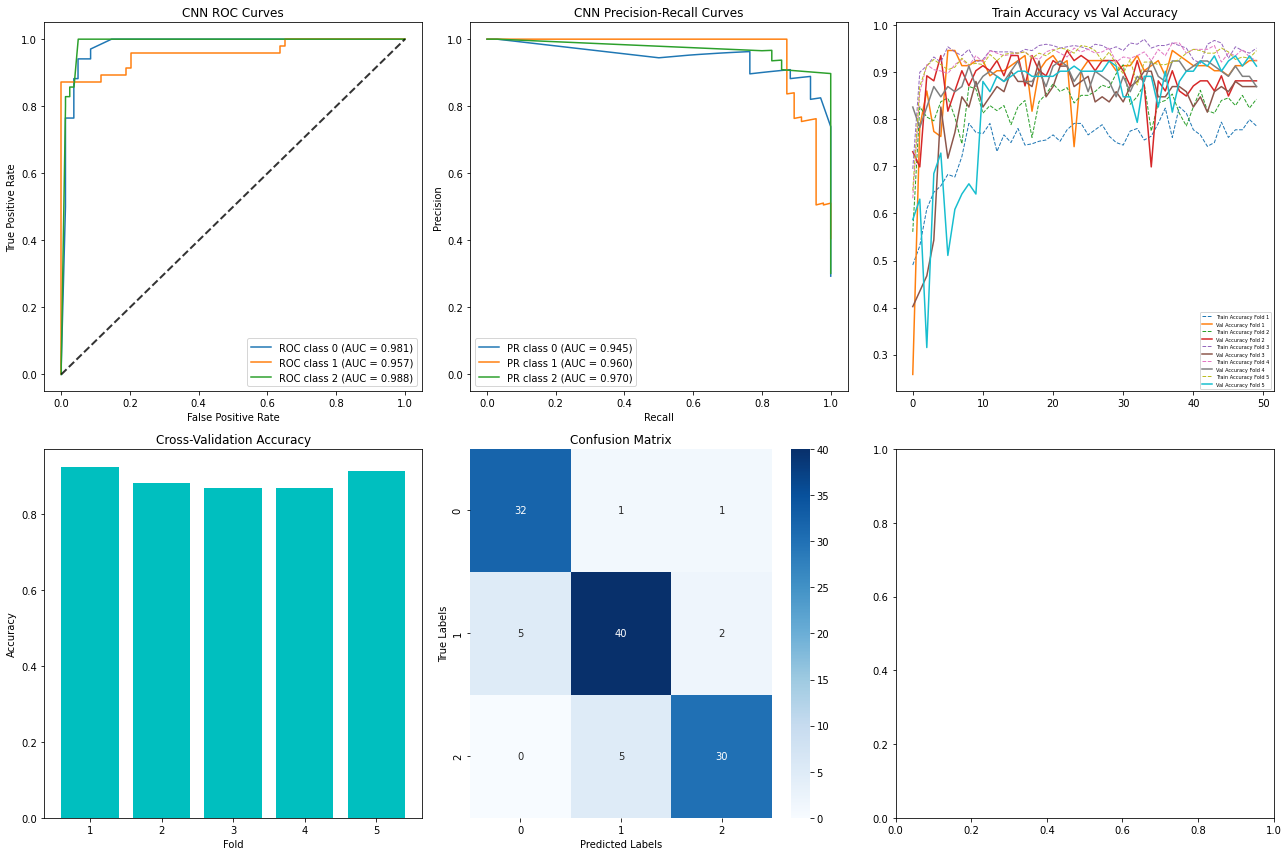

In [91]:
# no_classes = 3  # Number of classes
# num_folds = 5  # Number of folds

# Create new subplots for the plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
ax11, ax12, ax13, ax14, ax15, ax16 = axes.flatten()

# Plot ROC curve for each class
for i in range(classes):
    fpr_keras, tpr_keras, _ = roc_curve(y_test2[:, i], y_pred_keras[:, i])
    auc_keras = auc(fpr_keras, tpr_keras)
    ax11.plot(fpr_keras, tpr_keras, label='ROC class {} (AUC = {:.3f})'.format(i, auc_keras))

ax11.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', alpha=.8)
ax11.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title="CNN ROC Curves")
ax11.legend(loc='lower right')

# Plot PR curve for each class
for i in range(classes):
    precision, recall, _ = precision_recall_curve(y_test2[:, i], y_pred_keras[:, i])
    pr_auc = auc(recall, precision)
    ax12.plot(recall, precision, label='PR class {} (AUC = {:.3f})'.format(i, pr_auc))

ax12.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], xlabel='Recall', ylabel='Precision', title="CNN Precision-Recall Curves")
ax12.legend(loc='lower left')

# Calculate predictions
y_pred = model.predict(X_test2)
y_pred_cls = np.argmax(y_pred, axis=1)

# Calculate and print MCC metrics
conf_matrix = confusion_matrix(y_test, y_pred_cls)
class_report = classification_report(y_test, y_pred_cls)
mcc = matthews_corrcoef(y_test, y_pred_cls)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("MCC:", mcc)

# Plot Train Accuracy vs Val Accuracy for each fold
for fold in range(num_folds):
    ax13.plot(model_history[fold]['acc'], linestyle='--', lw=1, label='Train Accuracy Fold {}'.format(fold + 1))
    ax13.plot(model_history[fold]['val_acc'], label='Val Accuracy Fold {}'.format(fold + 1))

ax13.set(title='Train Accuracy vs Val Accuracy')
ax13.legend(prop={'size': 5})

# Plot Cross-Validation Accuracy for each fold
cross_val_accuracy = [history['val_acc'][-1] for history in model_history]
ax14.bar(range(1, num_folds + 1), cross_val_accuracy, color='c')
ax14.set(title='Cross-Validation Accuracy', xlabel='Fold', ylabel='Accuracy')

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax15)
ax15.set(title='Confusion Matrix', xlabel='Predicted Labels', ylabel='True Labels')

# You can add other plots as needed in the remaining axes (ax16, ax17, etc.)

# Adjust layout and display the plots
plt.tight_layout()
plt.savefig("../figures/CNN_Training_Val_Evaluation.jpg")
plt.show()

In [111]:
df_filterd=pd.read_csv("filtered_SNP_training_data.csv")
df_filterd

,Isolation source,category,BioSample,sra_accession,country,480,534,646,681,793,...,4824043,4825851,396260,577679,3576077,4392817,4524297,372920,372994,3520230
0,cattle stool (Bos taurus),bovine,SAMN07163935,SRR5627235,nigeria,3.0,4.0,2.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,cattle stool (Bos taurus),bovine,SAMN07163938,SRR5627238,nigeria,3.0,4.0,2.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,cattle stool (Bos taurus),bovine,SAMN07163941,SRR5627163,nigeria,3.0,4.0,2.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,cattle stool (Bos taurus),bovine,SAMN07163937,SRR5627236,nigeria,3.0,4.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,cattle stool (Bos taurus),bovine,SAMN07163936,SRR5627241,nigeria,3.0,4.0,2.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,Poultry (Meat),poultry,SAMN19025268,SRR14434490,south_africa,3.0,4.0,2.0,0.0,4.0,...,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,0.0
606,Bovine (Fecal),bovine,SAMN19025267,SRR14434491,south_africa,3.0,4.0,2.0,0.0,4.0,...,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,3.0
607,Bovine (Fecal),bovine,SAMN19025266,SRR14434492,south_africa,3.0,4.0,2.0,0.0,4.0,...,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,3.0
608,Bovine (Fecal),bovine,SAMN19025257,SRR14434493,south_africa,3.0,4.0,2.0,0.0,4.0,...,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,0.0


In [ ]:
def CNN(df):
#     df.to_csv("updated_merged_training_data.csv")
    X=df.drop(columns=["category","BioSample","sra_accession","country","Isolation source"])
    y=df["category"]
    y
    from sklearn.preprocessing import LabelEncoder
    # Assuming you have a DataFrame named df with a "category" column
    # Extract the "category" column as a pandas Series
    y = df["category"]

    # Initialize the LabelEncoder
    label_encoder = LabelEncoder()

    # Fit and transform the label encoder on the extracted Series
    encoded_labels = label_encoder.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X.values, encoded_labels, test_size=0.2, random_state=42,stratify=encoded_labels)

    inputs = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
    inputs = inputs.astype('float32')
    targets = to_categorical(y_train)
    inputs.shape,targets.shape

    X_test2 = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
    X_test2 = X_test2.astype('float32')
    y_test2 = to_categorical(y_test)
    X_test2.shape,y_test2.shape

    ############################# Model training #####################
    batch_size = 8
    no_classes = 3
    no_epochs = 50
    verbosity = 1
    num_folds = 5

# Define the K-fold Cross Validator
    kfold = KFold(n_splits=num_folds, shuffle=True)
    # K-fold Cross Validation model evaluation
    fold_no = 1
    model_history=[]
    for train, test in kfold.split(inputs, targets):
        model = Sequential()
        model.add(Conv1D(filters=8, kernel_size=3,activation='relu', input_shape=(X_test.shape[1],1)))
        model.add(BatchNormalization())
        model.add(Conv1D(filters=8, kernel_size=3, padding='same', activation='relu'))
        #model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=(2)))
        model.add(Conv1D(filters=16, kernel_size=3, padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(Conv1D(filters=16, kernel_size=3, padding='same', activation='relu'))
        #model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=(2)))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(3,activation='softmax'))
        # Model compilation
        model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc',f1_m,precision_m, recall_m])
        # Generate a print
        print('--------------------------------')
        print(f'Training for fold {fold_no} ...')
        ## checkpoint for saving model
        filepath="Train_CNN_weights.best.hdf5"
        checkpoint = ModelCheckpoint(filepath, monitor='val_f1_m', verbose=1, save_best_only=True,mode='max')
        callbacks_list = [checkpoint]
        # Fit data to model
        train_model = model.fit(inputs[train], targets[train],batch_size=batch_size,epochs=no_epochs,callbacks=callbacks_list,verbose=verbosity,validation_data=(inputs[test], targets[test]))
        model_history.append(train_model.history)
        # Increase fold number
        fold_no = fold_no + 1

    # Create new subplots for the plots
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
    ax11, ax12, ax13, ax14, ax15, ax16 = axes.flatten()

    # Plot ROC curve for each class
    for i in range(classes):
        fpr_keras, tpr_keras, _ = roc_curve(y_test2[:, i], y_pred_keras[:, i])
        auc_keras = auc(fpr_keras, tpr_keras)
        ax11.plot(fpr_keras, tpr_keras, label='ROC class {} (AUC = {:.3f})'.format(i, auc_keras))

    ax11.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', alpha=.8)
    ax11.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title="CNN ROC Curves")
    ax11.legend(loc='lower right')

    # Plot PR curve for each class
    for i in range(classes):
        precision, recall, _ = precision_recall_curve(y_test2[:, i], y_pred_keras[:, i])
        pr_auc = auc(recall, precision)
        ax12.plot(recall, precision, label='PR class {} (AUC = {:.3f})'.format(i, pr_auc))

    ax12.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], xlabel='Recall', ylabel='Precision', title="CNN Precision-Recall Curves")
    ax12.legend(loc='lower left')

    # Calculate predictions
    y_pred = model.predict(X_test2)
    y_pred_cls = np.argmax(y_pred, axis=1)

    # Calculate and print MCC metrics
    conf_matrix = confusion_matrix(y_test, y_pred_cls)
    class_report = classification_report(y_test, y_pred_cls)
    mcc = matthews_corrcoef(y_test, y_pred_cls)

    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)
    print("MCC:", mcc)

    # Plot Train Accuracy vs Val Accuracy for each fold
    for fold in range(num_folds):
        ax13.plot(model_history[fold]['acc'], linestyle='--', lw=1, label='Train Accuracy Fold {}'.format(fold + 1))
        ax13.plot(model_history[fold]['val_acc'], label='Val Accuracy Fold {}'.format(fold + 1))

    ax13.set(title='Train Accuracy vs Val Accuracy')
    ax13.legend(prop={'size': 5})

    # Plot Cross-Validation Accuracy for each fold
    cross_val_accuracy = [history['val_acc'][-1] for history in model_history]
    ax14.bar(range(1, num_folds + 1), cross_val_accuracy, color='c')
    ax14.set(title='Cross-Validation Accuracy', xlabel='Fold', ylabel='Accuracy')

    # Plot Confusion Matrix
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax15)
    ax15.set(title='Confusion Matrix', xlabel='Predicted Labels', ylabel='True Labels')

    # You can add other plots as needed in the remaining axes (ax16, ax17, etc.)

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.savefig("../figures/CNN_Training_Val_Evaluation_filtered.jpg")
    plt.show()

In [138]:
type(y_pred_keras)

numpy.ndarray

In [140]:
y_test2

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1

In [130]:
categories=["poultry","swine","bovine"]
df_new=df_filterd[df_filterd["category"].isin(categories)]

--------------------------------
Training for fold 1 ...
Epoch 1/50
47/47 [==============================] - ETA: 0s - loss: 39.7441 - acc: 0.5772 - f1_m: 0.5836 - precision_m: 0.5851 - recall_m: 0.5824
Epoch 1: val_f1_m improved from -inf to 0.44028, saving model to Train_CNN_weights.best.hdf5


/home/jupyter-onyangob/.local/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


47/47 [==============================] - 11s 196ms/step - loss: 39.7441 - acc: 0.5772 - f1_m: 0.5836 - precision_m: 0.5851 - recall_m: 0.5824 - val_loss: 3.0349 - val_acc: 0.4516 - val_f1_m: 0.4403 - val_precision_m: 0.4458 - val_recall_m: 0.4354
Epoch 2/50
47/47 [==============================] - ETA: 0s - loss: 2.0646 - acc: 0.8401 - f1_m: 0.8431 - precision_m: 0.8431 - recall_m: 0.8431
Epoch 2: val_f1_m improved from 0.44028 to 0.86250, saving model to Train_CNN_weights.best.hdf5
47/47 [==============================] - 10s 208ms/step - loss: 2.0646 - acc: 0.8401 - f1_m: 0.8431 - precision_m: 0.8431 - recall_m: 0.8431 - val_loss: 0.4806 - val_acc: 0.8602 - val_f1_m: 0.8625 - val_precision_m: 0.8673 - val_recall_m: 0.8583
Epoch 3/50
47/47 [==============================] - ETA: 0s - loss: 0.5669 - acc: 0.8889 - f1_m: 0.8858 - precision_m: 0.8921 - recall_m: 0.8803
Epoch 3: val_f1_m did not improve from 0.86250
47/47 [==============================] - 9s 186ms/step - loss: 0.5669 - ac

Epoch 20/50
47/47 [==============================] - ETA: 0s - loss: 0.1522 - acc: 0.9241 - f1_m: 0.9295 - precision_m: 0.9683 - recall_m: 0.8989
Epoch 20: val_f1_m did not improve from 0.95208
47/47 [==============================] - 8s 171ms/step - loss: 0.1522 - acc: 0.9241 - f1_m: 0.9295 - precision_m: 0.9683 - recall_m: 0.8989 - val_loss: 0.1835 - val_acc: 0.9247 - val_f1_m: 0.9070 - val_precision_m: 1.0000 - val_recall_m: 0.8438
Epoch 21/50
47/47 [==============================] - ETA: 0s - loss: 0.1503 - acc: 0.9295 - f1_m: 0.9304 - precision_m: 0.9700 - recall_m: 0.8989
Epoch 21: val_f1_m did not improve from 0.95208
47/47 [==============================] - 8s 169ms/step - loss: 0.1503 - acc: 0.9295 - f1_m: 0.9304 - precision_m: 0.9700 - recall_m: 0.8989 - val_loss: 0.1516 - val_acc: 0.9247 - val_f1_m: 0.9166 - val_precision_m: 0.9777 - val_recall_m: 0.8750
Epoch 22/50
47/47 [==============================] - ETA: 0s - loss: 0.1711 - acc: 0.9268 - f1_m: 0.9402 - precision_m: 0.

47/47 [==============================] - 8s 173ms/step - loss: 0.1315 - acc: 0.9295 - f1_m: 0.9419 - precision_m: 0.9778 - recall_m: 0.9122 - val_loss: 0.1812 - val_acc: 0.9140 - val_f1_m: 0.9200 - val_precision_m: 0.9375 - val_recall_m: 0.9062
Epoch 39/50
47/47 [==============================] - ETA: 0s - loss: 0.1424 - acc: 0.9350 - f1_m: 0.9389 - precision_m: 0.9776 - recall_m: 0.9069
Epoch 39: val_f1_m did not improve from 0.96111
47/47 [==============================] - 8s 167ms/step - loss: 0.1424 - acc: 0.9350 - f1_m: 0.9389 - precision_m: 0.9776 - recall_m: 0.9069 - val_loss: 0.1198 - val_acc: 0.9355 - val_f1_m: 0.9444 - val_precision_m: 0.9762 - val_recall_m: 0.9167
Epoch 40/50
47/47 [==============================] - ETA: 0s - loss: 0.1189 - acc: 0.9404 - f1_m: 0.9486 - precision_m: 0.9845 - recall_m: 0.9202
Epoch 40: val_f1_m did not improve from 0.96111
47/47 [==============================] - 8s 175ms/step - loss: 0.1189 - acc: 0.9404 - f1_m: 0.9486 - precision_m: 0.9845 -

47/47 [==============================] - 9s 186ms/step - loss: 0.1716 - acc: 0.9214 - f1_m: 0.9289 - precision_m: 0.9358 - recall_m: 0.9229 - val_loss: 0.3764 - val_acc: 0.8710 - val_f1_m: 0.8868 - val_precision_m: 0.9193 - val_recall_m: 0.8583
Epoch 7/50
47/47 [==============================] - ETA: 0s - loss: 0.4483 - acc: 0.9133 - f1_m: 0.9108 - precision_m: 0.9214 - recall_m: 0.9016
Epoch 7: val_f1_m did not improve from 0.88681
47/47 [==============================] - 7s 159ms/step - loss: 0.4483 - acc: 0.9133 - f1_m: 0.9108 - precision_m: 0.9214 - recall_m: 0.9016 - val_loss: 0.3060 - val_acc: 0.9355 - val_f1_m: 0.8754 - val_precision_m: 0.9658 - val_recall_m: 0.8063
Epoch 8/50
47/47 [==============================] - ETA: 0s - loss: 0.1409 - acc: 0.9485 - f1_m: 0.9464 - precision_m: 0.9654 - recall_m: 0.9309
Epoch 8: val_f1_m did not improve from 0.88681
47/47 [==============================] - 8s 161ms/step - loss: 0.1409 - acc: 0.9485 - f1_m: 0.9464 - precision_m: 0.9654 - rec

Epoch 44/50
47/47 [==============================] - ETA: 0s - loss: 0.1182 - acc: 0.9404 - f1_m: 0.9386 - precision_m: 0.9639 - recall_m: 0.9176
Epoch 44: val_f1_m did not improve from 0.88681
47/47 [==============================] - 8s 165ms/step - loss: 0.1182 - acc: 0.9404 - f1_m: 0.9386 - precision_m: 0.9639 - recall_m: 0.9176 - val_loss: 0.4165 - val_acc: 0.8495 - val_f1_m: 0.8741 - val_precision_m: 0.9193 - val_recall_m: 0.8375
Epoch 45/50
47/47 [==============================] - ETA: 0s - loss: 0.0865 - acc: 0.9621 - f1_m: 0.9613 - precision_m: 0.9721 - recall_m: 0.9521
Epoch 45: val_f1_m did not improve from 0.88681
47/47 [==============================] - 8s 164ms/step - loss: 0.0865 - acc: 0.9621 - f1_m: 0.9613 - precision_m: 0.9721 - recall_m: 0.9521 - val_loss: 0.3701 - val_acc: 0.8495 - val_f1_m: 0.8741 - val_precision_m: 0.9193 - val_recall_m: 0.8375
Epoch 46/50
47/47 [==============================] - ETA: 0s - loss: 0.0852 - acc: 0.9648 - f1_m: 0.9595 - precision_m: 0.

47/47 [==============================] - ETA: 0s - loss: 0.1381 - acc: 0.9270 - f1_m: 0.9280 - precision_m: 0.9460 - recall_m: 0.9149
Epoch 12: val_f1_m did not improve from 0.92569
47/47 [==============================] - 8s 164ms/step - loss: 0.1381 - acc: 0.9270 - f1_m: 0.9280 - precision_m: 0.9460 - recall_m: 0.9149 - val_loss: 0.5287 - val_acc: 0.9239 - val_f1_m: 0.9208 - val_precision_m: 0.9256 - val_recall_m: 0.9167
Epoch 13/50
47/47 [==============================] - ETA: 0s - loss: 0.1234 - acc: 0.9297 - f1_m: 0.9337 - precision_m: 0.9430 - recall_m: 0.9255
Epoch 13: val_f1_m did not improve from 0.92569
47/47 [==============================] - 8s 163ms/step - loss: 0.1234 - acc: 0.9297 - f1_m: 0.9337 - precision_m: 0.9430 - recall_m: 0.9255 - val_loss: 0.7261 - val_acc: 0.8804 - val_f1_m: 0.8854 - val_precision_m: 0.8854 - val_recall_m: 0.8854
Epoch 14/50
47/47 [==============================] - ETA: 0s - loss: 0.1637 - acc: 0.9270 - f1_m: 0.9278 - precision_m: 0.9457 - recal

Epoch 31/50
47/47 [==============================] - ETA: 0s - loss: 0.1116 - acc: 0.9568 - f1_m: 0.9576 - precision_m: 0.9677 - recall_m: 0.9495
Epoch 31: val_f1_m did not improve from 0.92569
47/47 [==============================] - 7s 155ms/step - loss: 0.1116 - acc: 0.9568 - f1_m: 0.9576 - precision_m: 0.9677 - recall_m: 0.9495 - val_loss: 1.1588 - val_acc: 0.9022 - val_f1_m: 0.9000 - val_precision_m: 0.9048 - val_recall_m: 0.8958
Epoch 32/50
47/47 [==============================] - ETA: 0s - loss: 0.1024 - acc: 0.9541 - f1_m: 0.9541 - precision_m: 0.9654 - recall_m: 0.9441
Epoch 32: val_f1_m did not improve from 0.92569
47/47 [==============================] - 7s 156ms/step - loss: 0.1024 - acc: 0.9541 - f1_m: 0.9541 - precision_m: 0.9654 - recall_m: 0.9441 - val_loss: 0.8118 - val_acc: 0.9022 - val_f1_m: 0.9035 - val_precision_m: 0.9122 - val_recall_m: 0.8958
Epoch 33/50
47/47 [==============================] - ETA: 0s - loss: 0.0927 - acc: 0.9568 - f1_m: 0.9504 - precision_m: 0.

Epoch 50/50
47/47 [==============================] - ETA: 0s - loss: 0.0864 - acc: 0.9541 - f1_m: 0.9530 - precision_m: 0.9601 - recall_m: 0.9468
Epoch 50: val_f1_m did not improve from 0.92708
47/47 [==============================] - 7s 157ms/step - loss: 0.0864 - acc: 0.9541 - f1_m: 0.9530 - precision_m: 0.9601 - recall_m: 0.9468 - val_loss: 1.6127 - val_acc: 0.9022 - val_f1_m: 0.9062 - val_precision_m: 0.9062 - val_recall_m: 0.9062
--------------------------------
Training for fold 4 ...
Epoch 1/50
47/47 [==============================] - ETA: 0s - loss: 34.0091 - acc: 0.6243 - f1_m: 0.6284 - precision_m: 0.6294 - recall_m: 0.6277
Epoch 1: val_f1_m improved from -inf to 0.81101, saving model to Train_CNN_weights.best.hdf5
47/47 [==============================] - 11s 190ms/step - loss: 34.0091 - acc: 0.6243 - f1_m: 0.6284 - precision_m: 0.6294 - recall_m: 0.6277 - val_loss: 0.8292 - val_acc: 0.8043 - val_f1_m: 0.8110 - val_precision_m: 0.8229 - val_recall_m: 0.8021
Epoch 2/50
47/47 [

Epoch 37/50
47/47 [==============================] - ETA: 0s - loss: 0.1239 - acc: 0.9595 - f1_m: 0.9441 - precision_m: 0.9597 - recall_m: 0.9309
Epoch 37: val_f1_m did not improve from 0.91042
47/47 [==============================] - 8s 160ms/step - loss: 0.1239 - acc: 0.9595 - f1_m: 0.9441 - precision_m: 0.9597 - recall_m: 0.9309 - val_loss: 0.5426 - val_acc: 0.9130 - val_f1_m: 0.9104 - val_precision_m: 0.9152 - val_recall_m: 0.9062
Epoch 38/50
47/47 [==============================] - ETA: 0s - loss: 0.1511 - acc: 0.9243 - f1_m: 0.9136 - precision_m: 0.9372 - recall_m: 0.8936
Epoch 38: val_f1_m did not improve from 0.91042
47/47 [==============================] - 7s 158ms/step - loss: 0.1511 - acc: 0.9243 - f1_m: 0.9136 - precision_m: 0.9372 - recall_m: 0.8936 - val_loss: 0.4845 - val_acc: 0.9022 - val_f1_m: 0.8948 - val_precision_m: 0.9325 - val_recall_m: 0.8646
Epoch 39/50
47/47 [==============================] - ETA: 0s - loss: 0.1878 - acc: 0.9324 - f1_m: 0.9323 - precision_m: 0.

Epoch 24/50
47/47 [==============================] - ETA: 0s - loss: 0.1518 - acc: 0.9270 - f1_m: 0.9331 - precision_m: 0.9452 - recall_m: 0.9229
Epoch 24: val_f1_m did not improve from 0.95833
47/47 [==============================] - 8s 169ms/step - loss: 0.1518 - acc: 0.9270 - f1_m: 0.9331 - precision_m: 0.9452 - recall_m: 0.9229 - val_loss: 0.6289 - val_acc: 0.9565 - val_f1_m: 0.9528 - val_precision_m: 0.9583 - val_recall_m: 0.9479
Epoch 25/50
47/47 [==============================] - ETA: 0s - loss: 0.1329 - acc: 0.9459 - f1_m: 0.9475 - precision_m: 0.9574 - recall_m: 0.9388
Epoch 25: val_f1_m did not improve from 0.95833
47/47 [==============================] - 8s 162ms/step - loss: 0.1329 - acc: 0.9459 - f1_m: 0.9475 - precision_m: 0.9574 - recall_m: 0.9388 - val_loss: 1.0254 - val_acc: 0.9348 - val_f1_m: 0.9375 - val_precision_m: 0.9375 - val_recall_m: 0.9375
Epoch 26/50
47/47 [==============================] - ETA: 0s - loss: 0.1577 - acc: 0.9351 - f1_m: 0.9252 - precision_m: 0.

Epoch 43/50
47/47 [==============================] - ETA: 0s - loss: 0.0952 - acc: 0.9541 - f1_m: 0.9546 - precision_m: 0.9574 - recall_m: 0.9521
Epoch 43: val_f1_m did not improve from 0.95833
47/47 [==============================] - 8s 162ms/step - loss: 0.0952 - acc: 0.9541 - f1_m: 0.9546 - precision_m: 0.9574 - recall_m: 0.9521 - val_loss: 0.8925 - val_acc: 0.9348 - val_f1_m: 0.9375 - val_precision_m: 0.9375 - val_recall_m: 0.9375
Epoch 44/50
47/47 [==============================] - ETA: 0s - loss: 0.1161 - acc: 0.9568 - f1_m: 0.9509 - precision_m: 0.9647 - recall_m: 0.9415
Epoch 44: val_f1_m did not improve from 0.95833
47/47 [==============================] - 8s 162ms/step - loss: 0.1161 - acc: 0.9568 - f1_m: 0.9509 - precision_m: 0.9647 - recall_m: 0.9415 - val_loss: 0.8792 - val_acc: 0.9457 - val_f1_m: 0.9479 - val_precision_m: 0.9479 - val_recall_m: 0.9479
Epoch 45/50
47/47 [==============================] - ETA: 0s - loss: 0.2092 - acc: 0.9432 - f1_m: 0.9422 - precision_m: 0.

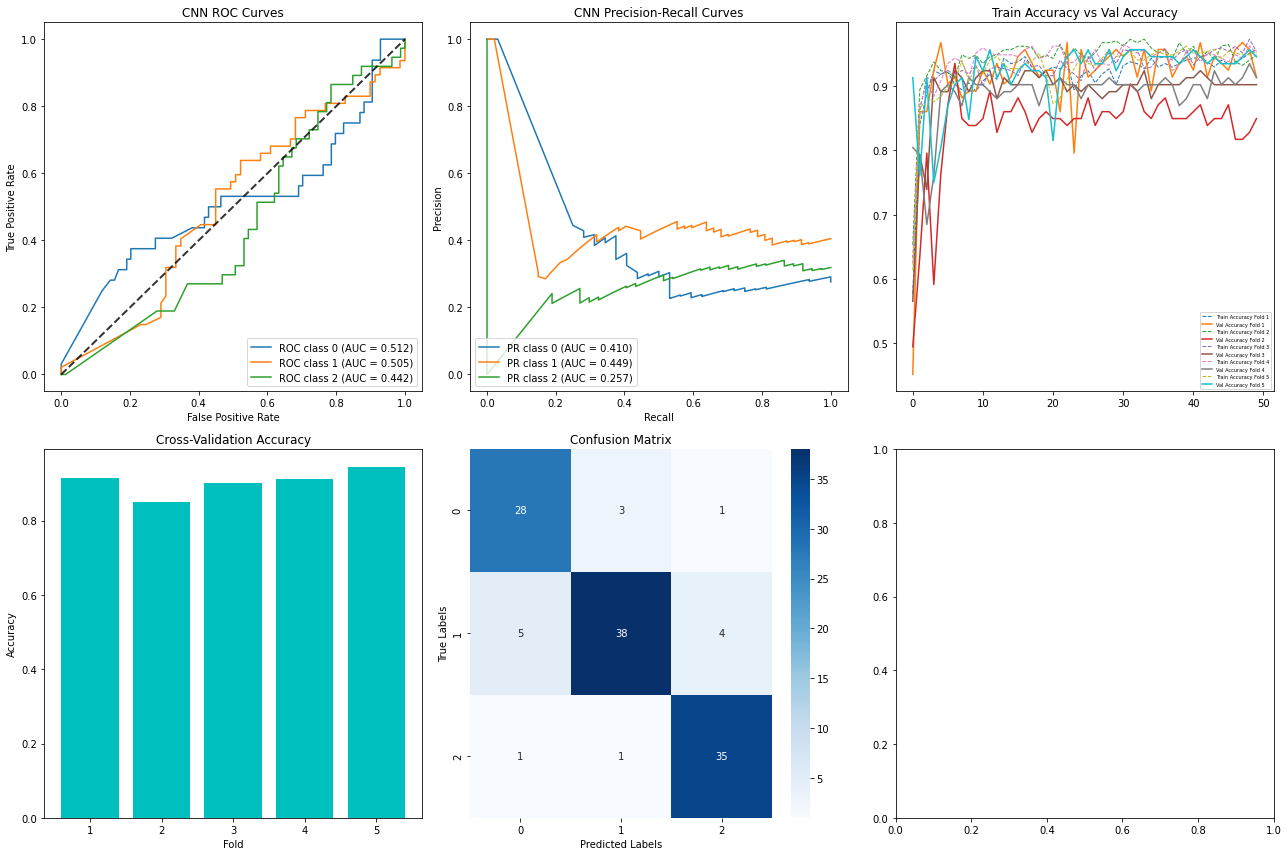

In [131]:
CNN(df_new)


In [142]:
# AUC and Logistic Regression
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
target_names = iris.target_names
X, y = iris.data, iris.target
y = iris.target_names[y]

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
n_classes = len(np.unique(y))
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)
(
    X_train,
    X_test,
    y_train,
    y_test,
) = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)

In [161]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
y_pred = classifier.fit(X_train, y_train).predict_proba(X_test)
y_score
# y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

from sklearn.preprocessing import LabelBinarizer
y_test
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
# y_onehot_test # (n_samples, n_classes)

In [181]:
# # plot ROC
# from itertools import cycle
# from sklearn.metrics import auc, roc_curve
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import RocCurveDisplay

# # store the fpr, tpr, and roc_auc for all averaging strategies
# fpr, tpr, roc_auc = dict(), dict(), dict()
# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_pred.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# micro_roc_auc_ovr = roc_auc_score(
#     y_test,
#     y_score,
#     multi_class="ovr",
#     average="micro",
# )

# # macro averaging 
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# fpr_grid = np.linspace(0.0, 1.0, 1000)

# # Interpolate all ROC curves at these points
# mean_tpr = np.zeros_like(fpr_grid)

# for i in range(n_classes):
#     mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# # Average it and compute AUC
# mean_tpr /= n_classes

# fpr["macro"] = fpr_grid
# tpr["macro"] = mean_tpr
# roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")
# macro_roc_auc_ovr = roc_auc_score(
#     y_test,
#     y_score,
#     multi_class="ovr",
#     average="macro",
# )

# print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")
# fig, ax = plt.subplots(figsize=(6, 6))

# plt.plot(
#     fpr["micro"],
#     tpr["micro"],
#     label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
#     color="deeppink",
#     linestyle=":",
#     linewidth=4,
# )

# plt.plot(
#     fpr["macro"],
#     tpr["macro"],
#     label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
#     color="navy",
#     linestyle=":",
#     linewidth=4,
# )

# colors = cycle(["aqua", "darkorange", "cornflowerblue"])
# for class_id, color in zip(range(n_classes), colors):
#     RocCurveDisplay.from_predictions(
#         y_onehot_test[:, class_id],
#         y_score[:, class_id],
#         name=f"ROC curve for {target_names[class_id]}",
#         color=color,
#         ax=ax,
#         plot_chance_level=(class_id == 2),
#     )

# plt.axis("square")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
# plt.legend()
# plt.show()

In [180]:
y_onehot_test.shape
y_pred.shape

(75, 3)

# Stratified cross validation

Scanning